In [1]:
import os
import csv
import numpy as np
import pandas as pd
import requests, zipfile
import dask.dataframe as dd
import sys

In [2]:
df = dd.read_csv('dataset.zip')
df.iloc[:,10]

/Users/drew/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/io/csv.py:531: UserWarning: Warning zip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


Dask Series Structure:
npartitions=1
    int64
      ...
Name: feature_unscheduled_malignant_shingling, dtype: int64
Dask Name: getitem, 2 tasks

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [4]:
from numerapi import NumerAPI
napi = NumerAPI()
napi.download_dataset("v4/train.parquet", "train.parquet")
napi.download_dataset("v4/validation.parquet", "validation.parquet")

2022-12-06 13:22:51,820 INFO numerapi.utils: target file already exists
2022-12-06 13:22:51,823 INFO numerapi.utils: download complete
2022-12-06 13:22:52,364 INFO numerapi.utils: target file already exists
2022-12-06 13:22:52,365 INFO numerapi.utils: download complete


In [5]:
training_data = pd.read_parquet('train.parquet')
print(training_data.shape)
print(training_data.head())   

(2420521, 1222)
                   era data_type  feature_honoured_observational_balaamite  \
id                                                                           
n003bba8a98662e4  0001     train                                       1.0   
n003bee128c2fcfc  0001     train                                       0.5   
n0048ac83aff7194  0001     train                                       0.5   
n00691bec80d3e02  0001     train                                       1.0   
n00b8720a2fdc4f2  0001     train                                       1.0   

                  feature_polaroid_vadose_quinze  \
id                                                 
n003bba8a98662e4                            0.50   
n003bee128c2fcfc                            1.00   
n0048ac83aff7194                            0.25   
n00691bec80d3e02                            0.50   
n00b8720a2fdc4f2                            0.75   

                  feature_untidy_withdrawn_bargeman  \
id               

In [6]:
features = [c for c in training_data if c.startswith("feature")]
targets = [c for c in training_data if c.startswith("target")]
training_data["erano"] = training_data.era.astype(int)

In [7]:
print(features[:5])
print(targets[:5])
print(training_data["erano"][:5])

['feature_honoured_observational_balaamite', 'feature_polaroid_vadose_quinze', 'feature_untidy_withdrawn_bargeman', 'feature_genuine_kyphotic_trehala', 'feature_unenthralled_sportful_schoolhouse']
['target', 'target_nomi_v4_20', 'target_nomi_v4_60', 'target_tyler_v4_20', 'target_tyler_v4_60']
id
n003bba8a98662e4    1
n003bee128c2fcfc    1
n0048ac83aff7194    1
n00691bec80d3e02    1
n00b8720a2fdc4f2    1
Name: erano, dtype: int64


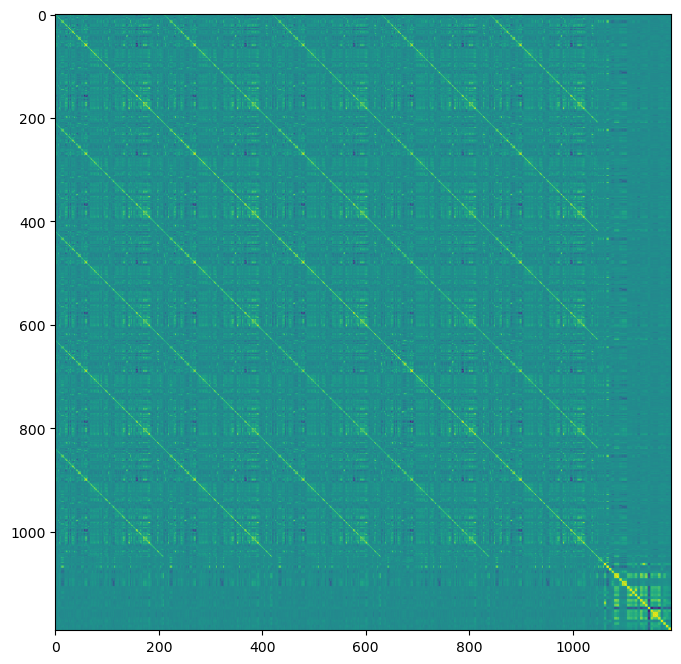

In [8]:
plt.figure(figsize = (8, 8))
plt.imshow(training_data[training_data.era == '0001'][features].corr())

In [9]:
df_A = training_data[training_data.era == '0001'][features[0]]
res = []
for i in range(len(features)):
    df_B = training_data[training_data.era == '0001'][features[i]]
    if df_A.corr(df_B) > 0.5:
        print((i, df_A.corr(df_B)))

(0, 1.0)
(25, 0.7639826422372228)
(26, 0.6820154291224686)
(196, 0.5270009643201542)
(210, 0.9047733847637416)
(235, 0.7099807135969142)
(236, 0.6248794599807136)
(420, 0.8543876567020249)
(445, 0.6728543876567019)
(446, 0.5802796528447444)
(630, 0.8758437801350047)
(655, 0.8042430086788813)
(656, 0.6552555448408871)
(826, 0.524831243972999)
(840, 0.944069431051109)
(865, 0.7418032786885245)
(866, 0.6499517839922854)
(1036, 0.5016875602700096)


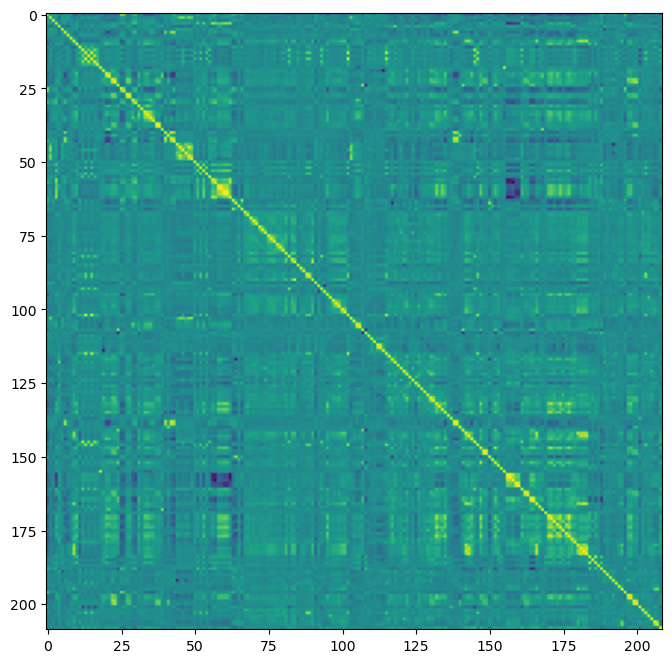

In [10]:
plt.figure(figsize = (8, 8))
plt.imshow(training_data[training_data.era == '0001'][features[:209]].corr())

In [11]:
eras = training_data.erano
last_era = eras[eras.shape[0] - 1]
sub_era_1 = eras.isin(np.arange(1, last_era, 4))
sub_era_2 = eras.isin(np.arange(2, last_era, 4))
sub_era_3 = eras.isin(np.arange(3, last_era, 4))
sub_era_4 = eras.isin(np.arange(4, last_era, 4))
   

In [12]:
reduced_features = features[0:209]

reduced_train1_X = training_data[sub_era_1][reduced_features]
reduced_train1_y = training_data[sub_era_1]['target']
reduced_training_data_1 = pd.concat([reduced_train1_X, reduced_train1_y], axis = 'columns')

print(reduced_train1_X.shape)
print(reduced_train1_y.shape)
print(reduced_training_data_1.shape)

(606176, 209)
(606176,)
(606176, 210)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [14]:
X_train, X_val, y_train, y_val = train_test_split(reduced_train1_X, reduced_train1_y, test_size = 0.2, random_state = 1)

In [20]:
xgb_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds=5,
              eval_set = [(X_val, y_val)])

[0]	validation_0-rmse:0.22382
[1]	validation_0-rmse:0.22381
[2]	validation_0-rmse:0.22379
[3]	validation_0-rmse:0.22378
[4]	validation_0-rmse:0.22376
[5]	validation_0-rmse:0.22375
[6]	validation_0-rmse:0.22374
[7]	validation_0-rmse:0.22373
[8]	validation_0-rmse:0.22372
[9]	validation_0-rmse:0.22371
[10]	validation_0-rmse:0.22370
[11]	validation_0-rmse:0.22369
[12]	validation_0-rmse:0.22368
[13]	validation_0-rmse:0.22368
[14]	validation_0-rmse:0.22367
[15]	validation_0-rmse:0.22366
[16]	validation_0-rmse:0.22366
[17]	validation_0-rmse:0.22365
[18]	validation_0-rmse:0.22364
[19]	validation_0-rmse:0.22364
[20]	validation_0-rmse:0.22363
[21]	validation_0-rmse:0.22363
[22]	validation_0-rmse:0.22362
[23]	validation_0-rmse:0.22362
[24]	validation_0-rmse:0.22361
[25]	validation_0-rmse:0.22361
[26]	validation_0-rmse:0.22360
[27]	validation_0-rmse:0.22360
[28]	validation_0-rmse:0.22359
[29]	validation_0-rmse:0.22359
[30]	validation_0-rmse:0.22359
[31]	validation_0-rmse:0.22358
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
xgb_model.score(X_val, y_val) # R^2 Cross Variance Score

0.0038955646885099338